In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from scipy.stats import ttest_ind
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

## 1. Импорт и анализ таблиц

In [2]:
df_data = pd.read_excel('df.xlsx', sheet_name='Data')
df_cl = pd.read_excel('df.xlsx', sheet_name='Clients')
df_reg = pd.read_excel('df.xlsx', sheet_name='Region_dict')

In [3]:
df_data.head()

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221000
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992000
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744000
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437000
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468000


In [4]:
df_cl.head()

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015


In [5]:
df_reg.head()

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37989 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     37989 non-null  int64  
 1   id_client    37401 non-null  float64
 2   amt_payment  35845 non-null  float64
 3   dtime_pay    35828 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [7]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55605 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55605 non-null  int64         
 3   id_trading_point  55605 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB


In [8]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


Выбрано удаление, т.к. нулы это не всегда 0. возможно это потерянные данные. А посчитав вместо этих данных 0, мы можем исказить конечный результат

In [9]:
df_data=df_data[~((df_data['id_client'].isnull()) | (df_data['amt_payment'].isnull()) | (df_data['dtime_pay'].isnull()))]

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35828 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     35828 non-null  int64  
 1   id_client    35828 non-null  float64
 2   amt_payment  35828 non-null  float64
 3   dtime_pay    35828 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ MB


In [11]:
df_cl = df_cl[~df_cl['dtime_ad'].isnull()]

In [12]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55356 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55356 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55356 non-null  int64         
 3   id_trading_point  55356 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 MB


In [13]:
df_reg_gr=df_reg.groupby('city').count()['id_trading_point'].reset_index().sort_values(by = 'id_trading_point', ascending = False)

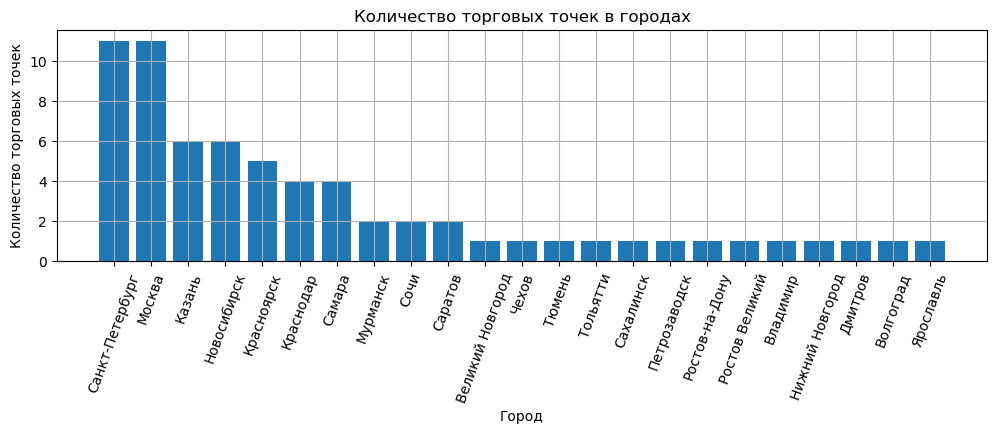

In [14]:
plt.figure(figsize=(12, 3))
plt.bar(df_reg_gr['city'],df_reg_gr['id_trading_point'])
plt.xlabel('Город')
plt.ylabel('Количество торговых точек')
plt.title('Количество торговых точек в городах')
plt.xticks(rotation=70)
plt.grid()
plt.show()

## 2. Объединение таблиц

In [15]:
print(len(df_cl))
print(df_cl.nunique()['id_client'])

55356
55356


In [16]:
df=df_data.merge(df_cl, on='id_client', how = 'outer')
df=df.merge(df_reg, on = 'id_trading_point')
# df

In [17]:
df_cl_sum = df.groupby(['id_client','id_trading_point','city']).agg ({'id_order':'count','amt_payment':'sum'}).reset_index()
df_cl_sum

,id_client,id_trading_point,city,id_order,amt_payment
0,178561.0,453.0,Санкт-Петербург,1,3052.0
1,178562.0,2652.0,Москва,1,2439.0
2,178563.0,112.0,Санкт-Петербург,1,768.0
3,178564.0,26.0,Ростов-на-Дону,0,0.0
4,178565.0,739.0,Новосибирск,1,958.0
...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0
55352,331950.0,1654.0,Москва,0,0.0
55353,331954.0,544.0,Казань,0,0.0
55354,331955.0,72.0,Сочи,0,0.0


In [18]:
df['amt_payment'] = df['amt_payment'].fillna(0)

In [19]:
df_fin=df_cl_sum.merge(df_cl[['id_client', 'dtime_ad', 'nflag_test']], on ='id_client')

In [20]:
df_fin.isnull().any()

id_client           False
id_trading_point    False
city                False
id_order            False
amt_payment         False
dtime_ad            False
nflag_test          False
dtype: bool

In [21]:
df_fin.head()

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1
3,178564.0,26.0,Ростов-на-Дону,0,0.0,2022-06-03 02:53:10.089,1
4,178565.0,739.0,Новосибирск,1,958.0,2022-06-03 02:55:13.525,1


In [22]:
df_fin['flag'] = np.where(df_fin['amt_payment']>0,1,0)

In [23]:
df_fin.head()

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test,flag
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0,1
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0,1
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1,1
3,178564.0,26.0,Ростов-на-Дону,0,0.0,2022-06-03 02:53:10.089,1,0
4,178565.0,739.0,Новосибирск,1,958.0,2022-06-03 02:55:13.525,1,1


In [24]:
df_fin.groupby('city').nunique()['id_trading_point'].reset_index().sort_values('id_trading_point', ascending = False).head(5)

,city,id_trading_point
15,Санкт-Петербург,11
7,Москва,11
4,Казань,6
10,Новосибирск,6
6,Красноярск,5


## 3. Автоматизация статистических вычислений

In [25]:
def test_calc(r1, r2, alpha = 0.05):
    
    s,p = ttest_ind(r1,r2)
    
    if p > alpha:
        print("Гипотеза H0 подтверждается: средние равны")
    else:
        print("Гипотеза H0 не подтверждается: средние не равны")
    
    print("Среднее значение 1 ряда", r1.mean())
    print("Среднее значение 2 ряда", r2.mean())
    print("Разница средних = ", r1.mean()-r2.mean())
    print("P_value = ",p)
    print('s = ',s, 'p = ',p)
    return s, p

In [26]:
def mann_whitney_func(r1, r2, alpha=.05):
    
    s, p = mannwhitneyu(r1, r2)
    
    if p < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    
    print("P_value = ",p)
    print('s = ',s, 'p = ',p)
    return s, p

## 4. Чистка неверно заполненных точек

In [27]:
zero_list=[]

for i in df_fin['id_trading_point'].unique():
    df_loc = df_fin[df_fin['id_trading_point']==i]
    sum_a = df_fin[ (df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].sum()['amt_payment'].sum()  
    sum_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].sum()['amt_payment'].sum()
    if (sum_a==0) | (sum_b==0):
        zero_list.append(i)
print(zero_list)

C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\1397129841.py:5: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a = df_fin[ (df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\1397129841.py:6: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].sum()['amt_payment'].sum()
C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\1397129841.py:5: FutureWarning: The default value of

[26.0, 739.0, 866.0, 46.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0, 1.0, 13.0, 23.0, 4.0, 7.0]


C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\1397129841.py:5: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a = df_fin[ (df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\1397129841.py:6: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].sum()['amt_payment'].sum()
C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\1397129841.py:5: FutureWarning: The default value of

In [28]:
print(zero_list)

[26.0, 739.0, 866.0, 46.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0, 1.0, 13.0, 23.0, 4.0, 7.0]


In [29]:
count_list=[]

for i in df_fin['id_trading_point'].unique():
#     df_loc = df_fin[df_fin['id_trading_point']==i]
    count_a = df_fin[ (df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].count()['amt_payment'].sum()  
    count_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].count()['amt_payment'].sum()
    if (count_a==0) | (count_b==0):
        count_list.append(i)
print(count_list)

[739.0, 866.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0]


## 5. Расчет общих результатов АБ Теста

In [30]:
df_fin=df_fin[~df_fin['id_trading_point'].isin(zero_list+count_list)]
df_fin.describe()

,id_client,id_trading_point,id_order,amt_payment,nflag_test,flag
count,45318.000000,45318.000000,45318.000000,45318.000000,45318.000000,45318.000000
mean,228009.605918,1202.962002,0.653140,2319.490534,0.495278,0.521316
std,45298.985278,1792.091001,0.765635,2963.928692,0.499983,0.499551
min,178561.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,192426.250000,112.000000,0.000000,0.000000,0.000000,0.000000
50%,206413.500000,453.000000,1.000000,1178.000000,0.000000,1.000000
75%,262840.000000,1654.000000,1.000000,3911.000000,1.000000,1.000000
max,331964.000000,9931.000000,10.000000,43083.000000,1.000000,1.000000


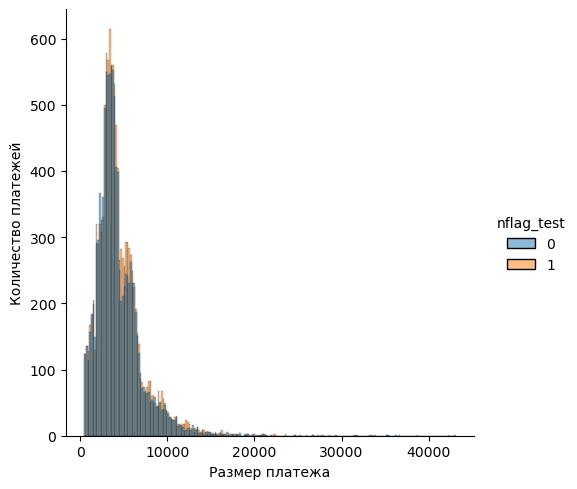

In [31]:
sns.displot(df_fin[df_fin['amt_payment']>0], x ='amt_payment', hue ='nflag_test')
plt.xlabel('Размер платежа')
plt.ylabel('Количество платежей')
plt.show()

In [32]:
test_calc(df_fin[df_fin['nflag_test']==1]['amt_payment'],df_fin[df_fin['nflag_test']==0]['amt_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2452.2773446201827
Среднее значение 2 ряда 2189.1884317754557
Разница средних =  263.088912844727
P_value =  3.3214645838934018e-21
s =  9.456798235171377 p =  3.3214645838934018e-21


(9.456798235171377, 3.3214645838934018e-21)

In [33]:
test_calc(df_fin[df_fin['nflag_test']==1]['flag'],df_fin[df_fin['nflag_test']==0]['flag'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5432835820895522
Среднее значение 2 ряда 0.49975954181786386
Разница средних =  0.043524040271688325
P_value =  1.7338073027564523e-20
s =  9.282032730948323 p =  1.7338073027564523e-20


(9.282032730948323, 1.7338073027564523e-20)

In [34]:
mann_whitney_func(df_fin[df_fin['nflag_test']==1]['amt_payment'],df_fin[df_fin['nflag_test']==0]['amt_payment'])

Распределения не равны
P_value =  3.008345273971901e-24
s =  270040116.0 p =  3.008345273971901e-24


(270040116.0, 3.008345273971901e-24)

## 6. Сегментация результатов АБ Теста

In [35]:
all_city=list(df_fin['city'].unique())
all_city

['Санкт-Петербург',
 'Москва',
 'Саратов',
 'Тольятти',
 'Владимир',
 'Мурманск',
 'Красноярск',
 'Казань',
 'Самара',
 'Волгоград',
 'Сочи',
 'Краснодар',
 'Дмитров',
 'Тюмень',
 'Сахалинск']

Город Москва

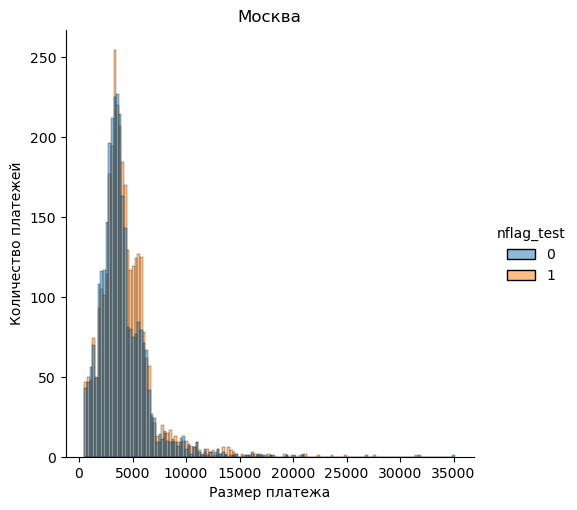

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2367.9590805347243
Среднее значение 2 ряда 1986.18059125964
Разница средних =  381.7784892750842
P_value =  1.757549439555765e-14
s =  7.676511027843395 p =  1.757549439555765e-14

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5435278774046299
Среднее значение 2 ряда 0.4879498714652956
Разница средних =  0.05557800593933432
P_value =  6.194689260032549e-10
s =  6.190312288026297 p =  6.194689260032549e-10

Распределения не равны
P_value =  7.010591402203484e-16
s =  20595574.5 p =  7.010591402203484e-16


(20595574.5, 7.010591402203484e-16)

In [36]:
df_city_msk=df_fin[df_fin['city']=='Москва']

sns.displot(df_city_msk[df_city_msk['amt_payment']>0], x ='amt_payment', hue ='nflag_test')
plt.xlabel('Размер платежа')
plt.ylabel('Количество платежей')
plt.title('Москва')

plt.show()

test_calc(df_city_msk[df_city_msk['nflag_test']==1]['amt_payment'],df_city_msk[df_city_msk['nflag_test']==0]['amt_payment'])
print()
test_calc(df_city_msk[df_city_msk['nflag_test']==1]['flag'],df_city_msk[df_city_msk['nflag_test']==0]['flag'])
print()
mann_whitney_func(df_city_msk[df_city_msk['nflag_test']==1]['amt_payment'],df_city_msk[df_city_msk['nflag_test']==0]['amt_payment'])

город Санкт-Петербург

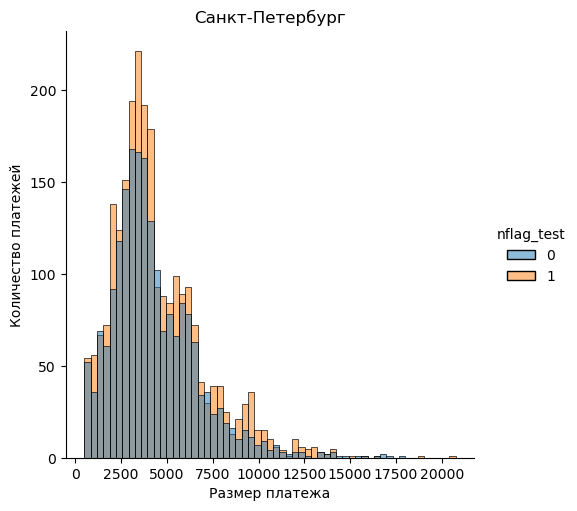

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2427.462542182227
Среднее значение 2 ряда 1913.5586377988272
Разница средних =  513.9039043833998
P_value =  2.3198088937974163e-18
s =  8.759635784179547 p =  2.3198088937974163e-18

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5471316085489314
Среднее значение 2 ряда 0.44835363103292736
Разница средних =  0.09877797751600403
P_value =  1.065825659919673e-20
s =  9.352468686561785 p =  1.065825659919673e-20

Распределения не равны
P_value =  2.0392184217953754e-20
s =  10899685.5 p =  2.0392184217953754e-20


(10899685.5, 2.0392184217953754e-20)

In [37]:
df_city_spb = df_fin[df_fin['city']=='Санкт-Петербург']

sns.displot(df_city_spb[df_city_spb['amt_payment']>0], x ='amt_payment', hue ='nflag_test')
plt.xlabel('Размер платежа')
plt.ylabel('Количество платежей')
plt.title('Санкт-Петербург')

plt.show()

test_calc(df_city_spb[df_city_spb['nflag_test']==1]['amt_payment'],df_city_spb[df_city_spb['nflag_test']==0]['amt_payment'])
print()
test_calc(df_city_spb[df_city_spb['nflag_test']==1]['flag'],df_city_spb[df_city_spb['nflag_test']==0]['flag'])
print()
mann_whitney_func(df_city_spb[df_city_spb['nflag_test']==1]['amt_payment'],df_city_spb[df_city_spb['nflag_test']==0]['amt_payment'])


Санкт-Петербург



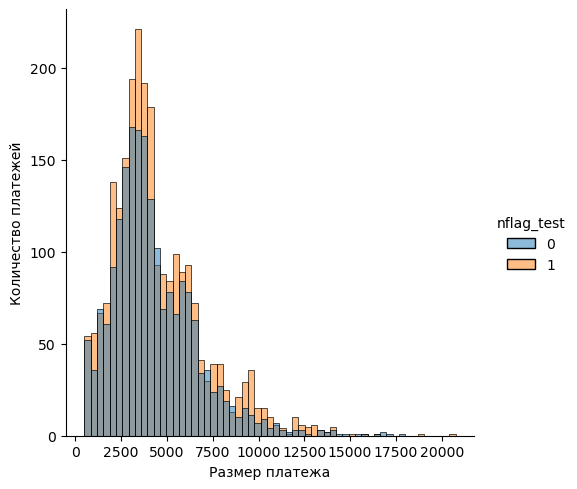

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2427.462542182227
Среднее значение 2 ряда 1913.5586377988272
Разница средних =  513.9039043833998
P_value =  2.3198088937974163e-18
s =  8.759635784179547 p =  2.3198088937974163e-18

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5471316085489314
Среднее значение 2 ряда 0.44835363103292736
Разница средних =  0.09877797751600403
P_value =  1.065825659919673e-20
s =  9.352468686561785 p =  1.065825659919673e-20

Распределения не равны
P_value =  2.0392184217953754e-20
s =  10899685.5 p =  2.0392184217953754e-20

Москва



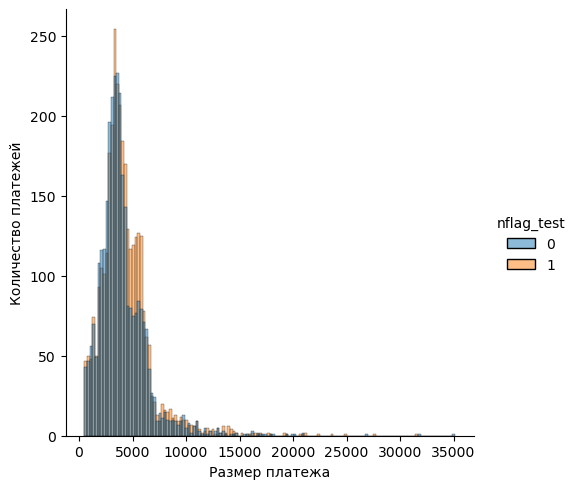

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2367.9590805347243
Среднее значение 2 ряда 1986.18059125964
Разница средних =  381.7784892750842
P_value =  1.757549439555765e-14
s =  7.676511027843395 p =  1.757549439555765e-14

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5435278774046299
Среднее значение 2 ряда 0.4879498714652956
Разница средних =  0.05557800593933432
P_value =  6.194689260032549e-10
s =  6.190312288026297 p =  6.194689260032549e-10

Распределения не равны
P_value =  7.010591402203484e-16
s =  20595574.5 p =  7.010591402203484e-16

Саратов



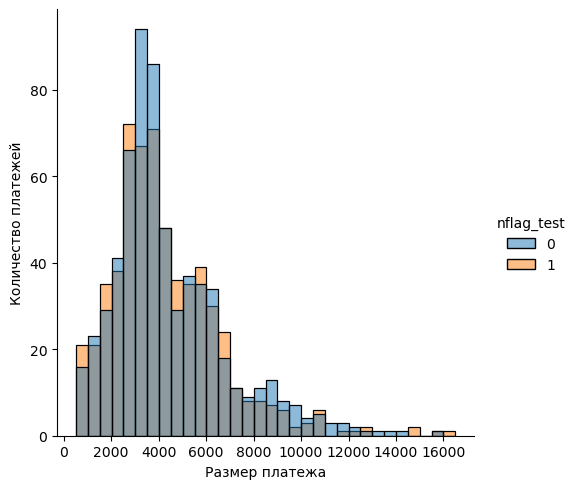

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2528.7887462981244
Среднее значение 2 ряда 2541.6456266907126
Разница средних =  -12.85688039258821
P_value =  0.9162512798549167
s =  -0.10516947629572568 p =  0.9162512798549167

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5883514313919053
Среднее значение 2 ряда 0.5743913435527502
Разница средних =  0.013960087839155033
P_value =  0.5152558091282406
s =  0.6507850002388366 p =  0.5152558091282406

Распределения равны
P_value =  0.7833257779753139
s =  565440.5 p =  0.7833257779753139

Тольятти



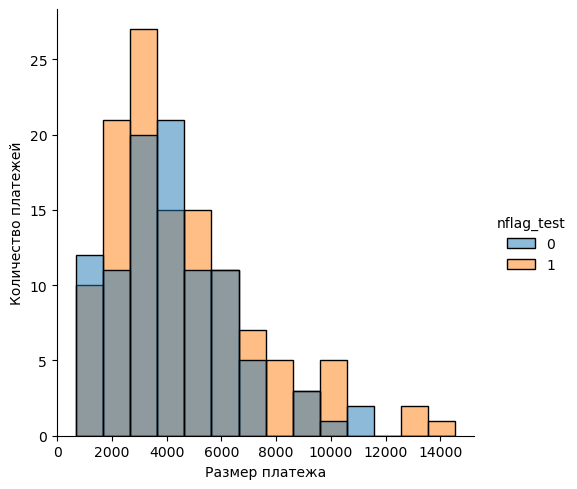

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2902.4105263157894
Среднее значение 2 ряда 2439.4610778443116
Разница средних =  462.9494484714778
P_value =  0.1333273246710206
s =  1.5045563456740754 p =  0.1333273246710206

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.6421052631578947
Среднее значение 2 ряда 0.5808383233532934
Разница средних =  0.061266939804601295
P_value =  0.2367531179978554
s =  1.185144360467606 p =  0.2367531179978554

Распределения равны
P_value =  0.22134177144014489
s =  17020.5 p =  0.22134177144014489

Владимир



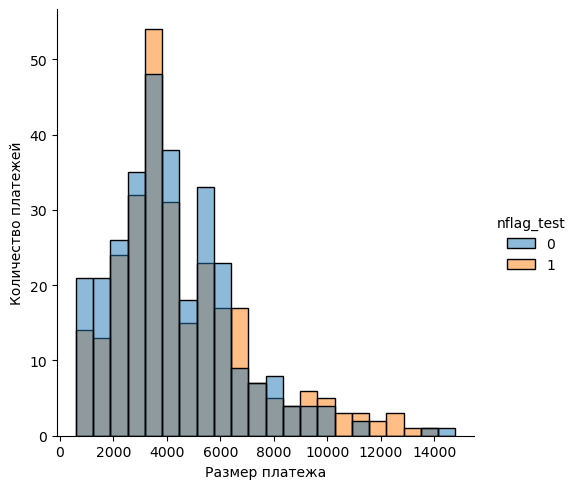

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2547.2200392927307
Среднее значение 2 ряда 2108.6101973684213
Разница средних =  438.6098419243094
P_value =  0.010095112170351712
s =  2.5769554932923184 p =  0.010095112170351712

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.550098231827112
Среднее значение 2 ряда 0.49835526315789475
Разница средних =  0.05174296866921729
P_value =  0.08481593543159477
s =  1.724937016780416 p =  0.08481593543159477

Распределения не равны
P_value =  0.03166761411886426
s =  165625.0 p =  0.03166761411886426

Мурманск



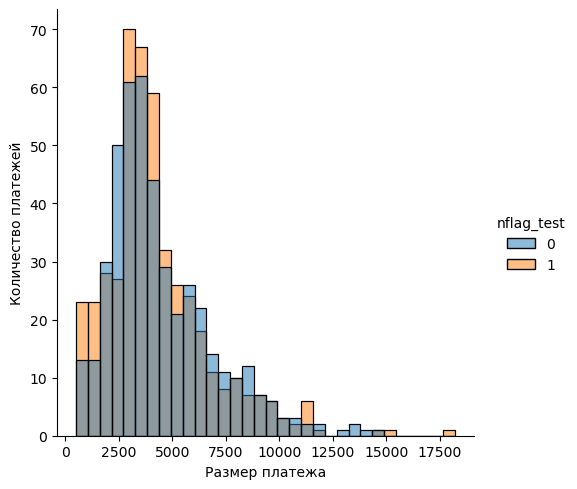

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1865.2710900473933
Среднее значение 2 ряда 1857.2197183098592
Разница средних =  8.051371737534055
P_value =  0.9449762446327565
s =  0.06902498862889384 p =  0.9449762446327565

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.4369668246445498
Среднее значение 2 ряда 0.4187793427230047
Разница средних =  0.018187481921545068
P_value =  0.3976422846466432
s =  0.8460108060373052 p =  0.3976422846466432

Распределения равны
P_value =  0.5434251528583327
s =  569507.5 p =  0.5434251528583327

Красноярск



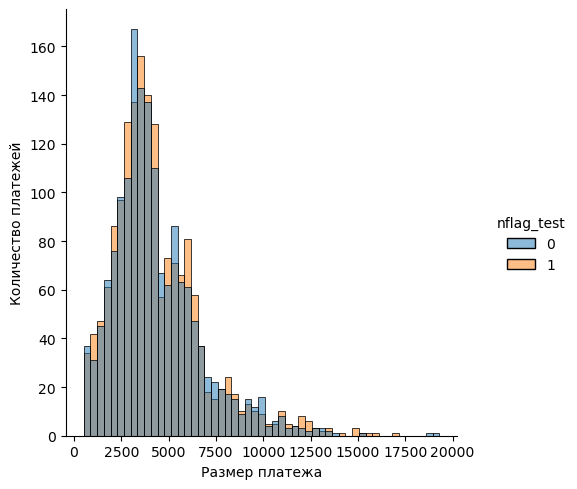

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2437.4958840961476
Среднее значение 2 ряда 2428.7775862068966
Разница средних =  8.718297889251062
P_value =  0.9044823881233125
s =  0.12000608689929208 p =  0.9044823881233125

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5577872900889035
Среднее значение 2 ряда 0.5613793103448276
Разница средних =  -0.003592020255924089
P_value =  0.7805336501430107
s =  -0.27863631219717744 p =  0.7805336501430107

Распределения равны
P_value =  0.8770469886251647
s =  4393882.0 p =  0.8770469886251647

Казань



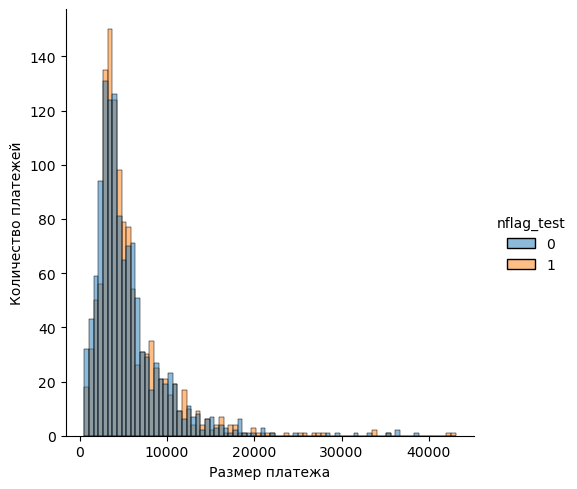

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2731.9132
Среднее значение 2 ряда 2610.688397361273
Разница средних =  121.22480263872694
P_value =  0.286688049247618
s =  1.0655273408818378 p =  0.286688049247618

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.4788
Среднее значение 2 ряда 0.47497089639115253
Разница средних =  0.003829103608847473
P_value =  0.784829789025573
s =  0.27304492857426443 p =  0.784829789025573

Распределения равны
P_value =  0.37726004167062477
s =  3263925.0 p =  0.37726004167062477

Самара



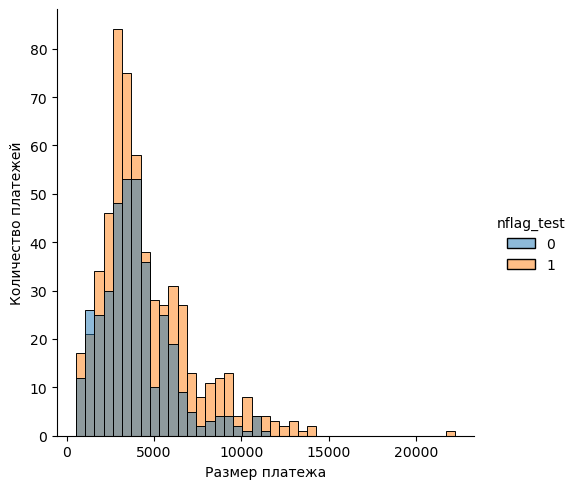

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 3262.78927680798
Среднее значение 2 ряда 1718.4172576832152
Разница средних =  1544.3720191247648
P_value =  1.1014020778472052e-29
s =  11.54083248253458 p =  1.1014020778472052e-29

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.7169576059850374
Среднее значение 2 ряда 0.4397163120567376
Разница средних =  0.2772412939282998
P_value =  3.981449742682522e-31
s =  11.846151689470245 p =  3.981449742682522e-31

Распределения не равны
P_value =  4.325201867794148e-30
s =  444975.5 p =  4.325201867794148e-30

Волгоград



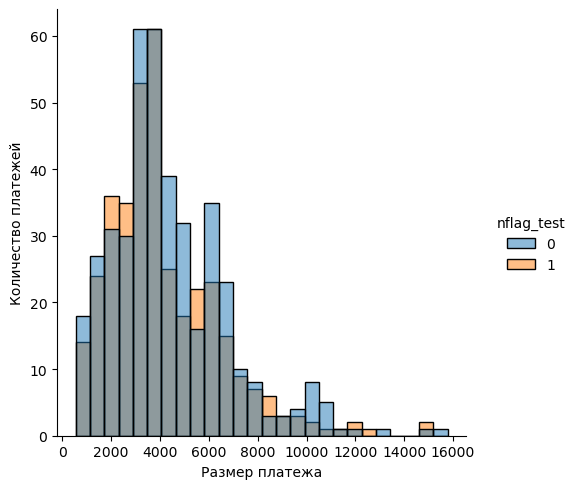

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2288.8706240487063
Среднее значение 2 ряда 2601.7610241820767
Разница средних =  -312.89040013337035
P_value =  0.03686899928098654
s =  -2.0892718943323443 p =  0.03686899928098654

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5525114155251142
Среднее значение 2 ряда 0.5960170697012802
Разница средних =  -0.04350565417616603
P_value =  0.10498894497258296
s =  -1.6222173039489063 p =  0.10498894497258296

Распределения не равны
P_value =  0.03323940159324537
s =  216128.0 p =  0.03323940159324537

Сочи



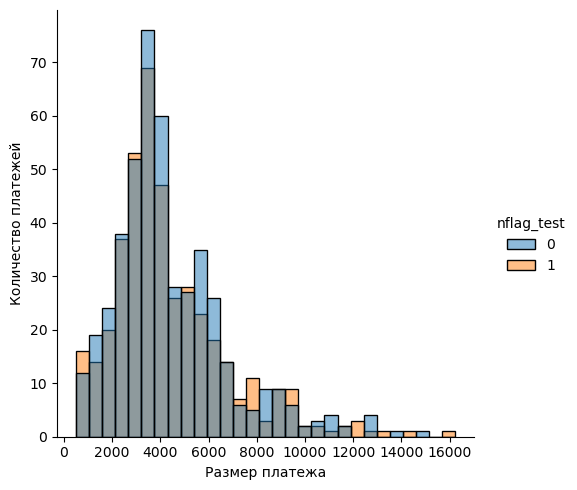

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2305.8304020100504
Среднее значение 2 ряда 2523.081885856079
Разница средних =  -217.2514838460288
P_value =  0.12297605685687794
s =  -1.5432162776667728 p =  0.12297605685687794

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5251256281407035
Среднее значение 2 ряда 0.5744416873449132
Разница средних =  -0.04931605920420967
P_value =  0.047319885252583245
s =  -1.9849560691617736 p =  0.047319885252583245

Распределения равны
P_value =  0.05698257474271896
s =  303988.5 p =  0.05698257474271896

Краснодар



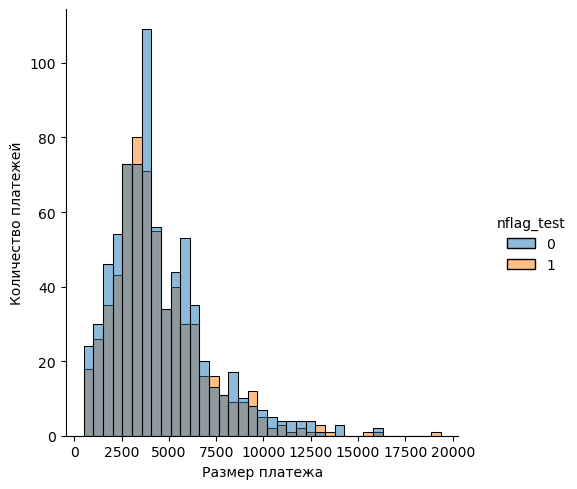

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2696.8046875
Среднее значение 2 ряда 2912.4310798946444
Разница средних =  -215.62639239464443
P_value =  0.085800112916198
s =  -1.718766529966594 p =  0.085800112916198

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.6142578125
Среднее значение 2 ряда 0.6532045654082529
Разница средних =  -0.03894675290825289
P_value =  0.060385275678499745
s =  -1.8789539353324407 p =  0.060385275678499745

Распределения равны
P_value =  0.05938101983441801
s =  556499.0 p =  0.05938101983441801

Дмитров



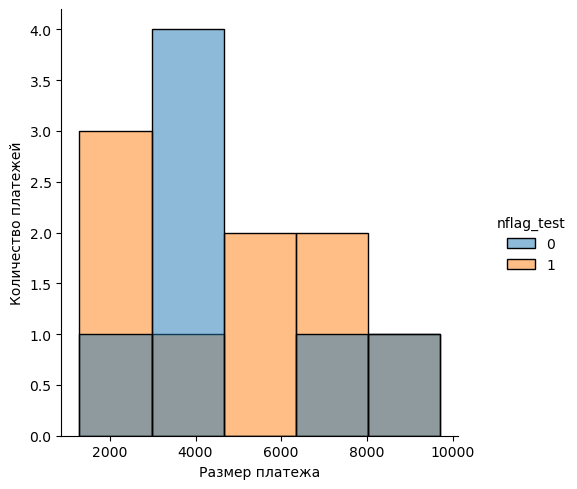

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 579.3333333333334
Среднее значение 2 ряда 483.4507042253521
Разница средних =  95.88262910798124
P_value =  0.7410763125801646
s =  0.3310524347645207 p =  0.7410763125801646

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.11538461538461539
Среднее значение 2 ряда 0.09859154929577464
Разница средних =  0.01679306608884075
P_value =  0.7429421277261778
s =  0.3285782051097396 p =  0.7429421277261778

Распределения равны
P_value =  0.7422551789442879
s =  2816.0 p =  0.7422551789442879

Тюмень



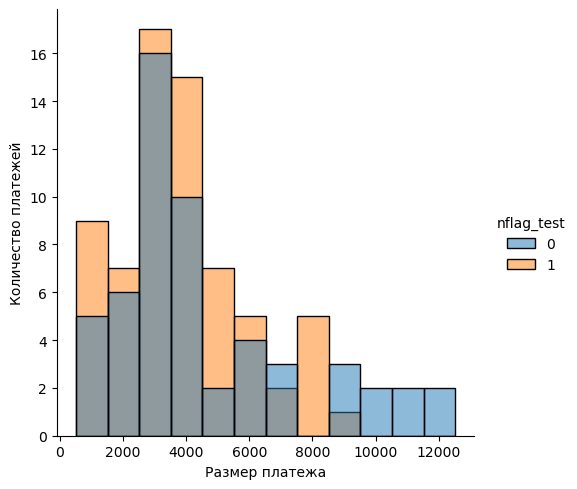

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2043.823076923077
Среднее значение 2 ряда 1743.376712328767
Разница средних =  300.4463645943099
P_value =  0.3550227648604757
s =  0.9264590634677944 p =  0.3550227648604757

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5230769230769231
Среднее значение 2 ряда 0.3767123287671233
Разница средних =  0.1463645943097998
P_value =  0.01451825932213329
s =  2.4598250966325907 p =  0.01451825932213329

Распределения не равны
P_value =  0.038066216007540725
s =  10741.0 p =  0.038066216007540725

Сахалинск



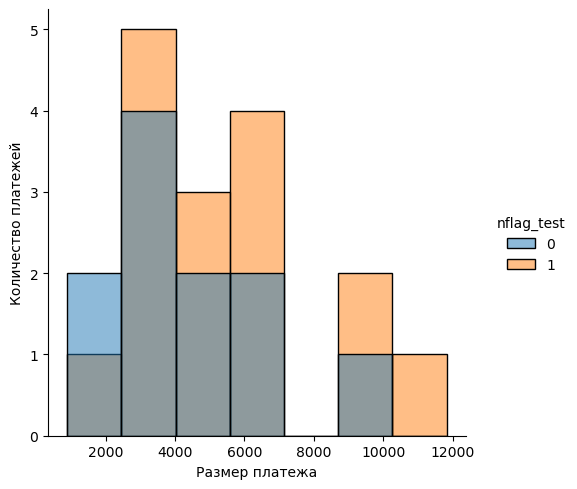

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1171.4533333333334
Среднее значение 2 ряда 600.1538461538462
Разница средних =  571.2994871794872
P_value =  0.105809212549273
s =  1.6270604929283115 p =  0.105809212549273

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.21333333333333335
Среднее значение 2 ряда 0.14102564102564102
Разница средних =  0.07230769230769232
P_value =  0.2436724740693643
s =  1.1704284638604745 p =  0.2436724740693643

Распределения равны
P_value =  0.19868569514015844
s =  3159.5 p =  0.19868569514015844


In [38]:
for i in all_city:
    print()
    print(i)
    print()
    df_all_city = df_fin[df_fin['city']==i]
    
    sns.displot(df_all_city[df_all_city['amt_payment']>0], x ='amt_payment', hue ='nflag_test')
    plt.xlabel('Размер платежа')
    plt.ylabel('Количество платежей')
    plt.show()

    test_calc(df_all_city[df_all_city['nflag_test']==1]['amt_payment'],df_all_city[df_all_city['nflag_test']==0]['amt_payment'])
    print()
    test_calc(df_all_city[df_all_city['nflag_test']==1]['flag'],df_all_city[df_all_city['nflag_test']==0]['flag'])
    print()
    mann_whitney_func(df_all_city[df_all_city['nflag_test']==1]['amt_payment'],df_all_city[df_all_city['nflag_test']==0]['amt_payment'])

## 7. Отчет по АБ Тесту

In [39]:
df_res=pd.DataFrame()

for i in df_fin['city'].unique():
    print("Город", i)
    print()
    df_loc = df_fin[df_fin['city']==i]
    
    for j in df_loc['id_trading_point'].unique():
        print("Торговая точка", j)
        print()
        df_loc_f      = df_loc[df_loc['id_trading_point']==j]
        count_test    = len(df_loc_f[df_loc_f['nflag_test']==1])
        count_control = len(df_loc_f[df_loc_f['nflag_test']==0])
        count_all     = count_test + count_control
        sigma_test    = df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'].std()
        sigma_control = df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'].std()
        avg_test      = np.mean(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'])
        avg_control   = np.mean(df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])
        diff          = avg_test-avg_control
        
        s_a,p_a =  test_calc(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'],df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])
        print()
        s_p,p_p =  test_calc(df_loc_f[df_loc_f['nflag_test']==1]['flag'],df_loc_f[df_loc_f['nflag_test']==0]['flag'])
        print()
        df_res = df_res.append({'city':i, 'id_trading_point':j
                               ,'count_test':count_test,'count_control':count_control, 'count_all':count_all
                               ,'avg_test': avg_test,'avg_control': avg_control
                               , 'sigma_test':sigma_test, 'sigma_control':sigma_control
                               , 'diff':diff, 'abs_ttest_s': s_a, 'abs_ttest_p': p_a
                               , 'pr_ttest_s':s_p, 'pr_ttest_p':p_p \
                               },ignore_index=True)

Город Санкт-Петербург

Торговая точка 453.0

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2501.966228893058
Среднее значение 2 ряда 1889.9237368922784
Разница средних =  612.0424920007797
P_value =  6.983206901274464e-07
s =  4.976910182958596 p =  6.983206901274464e-07

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5562851782363978
Среднее значение 2 ряда 0.43660629170638704
Разница средних =  0.11967888653001074
P_value =  3.381305634110329e-08
s =  5.541075590734413 p =  3.381305634110329e-08

Торговая точка 112.0

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2488.115030674847
Среднее значение 2 ряда 2218.636896046852
Разница средних =  269.4781346279947
P_value =  0.07683710303752554
s =  1.7707120159517762 p =  0.07683710303752554

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5766871165644172
Среднее значение 2 ряда 0.5168374816983895
Разница средних =  0.05984963486602768
P_va

Город Тольятти



C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\2044603043.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'city':i, 'id_trading_point':j
C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\2044603043.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'city':i, 'id_trading_point':j
C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\2044603043.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'city':i, 'id_trading_point':j
C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\2044603043.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

Торговая точка 88.0

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2902.4105263157894
Среднее значение 2 ряда 2439.4610778443116
Разница средних =  462.9494484714778
P_value =  0.1333273246710206
s =  1.5045563456740754 p =  0.1333273246710206

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.6421052631578947
Среднее значение 2 ряда 0.5808383233532934
Разница средних =  0.061266939804601295
P_value =  0.2367531179978554
s =  1.185144360467606 p =  0.2367531179978554

Город Владимир

Торговая точка 11.0

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2547.2200392927307
Среднее значение 2 ряда 2108.6101973684213
Разница средних =  438.6098419243094
P_value =  0.010095112170351712
s =  2.5769554932923184 p =  0.010095112170351712

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.550098231827112
Среднее значение 2 ряда 0.49835526315789475
Разница средних =  0.05174296866921729
P_value =  0.08481593543159477


C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\2044603043.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'city':i, 'id_trading_point':j
C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\2044603043.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'city':i, 'id_trading_point':j
C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\2044603043.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'city':i, 'id_trading_point':j
C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\2044603043.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

Торговая точка 19.0

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2043.823076923077
Среднее значение 2 ряда 1743.376712328767
Разница средних =  300.4463645943099
P_value =  0.3550227648604757
s =  0.9264590634677944 p =  0.3550227648604757

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5230769230769231
Среднее значение 2 ряда 0.3767123287671233
Разница средних =  0.1463645943097998
P_value =  0.01451825932213329
s =  2.4598250966325907 p =  0.01451825932213329

Город Сахалинск

Торговая точка 69.0

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1171.4533333333334
Среднее значение 2 ряда 600.1538461538462
Разница средних =  571.2994871794872
P_value =  0.105809212549273
s =  1.6270604929283115 p =  0.105809212549273

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.21333333333333335
Среднее значение 2 ряда 0.14102564102564102
Разница средних =  0.07230769230769232
P_value =  0.2436724740693643
s =  1

C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\2044603043.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'city':i, 'id_trading_point':j
C:\Users\Марсель\AppData\Local\Temp\ipykernel_5944\2044603043.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'city':i, 'id_trading_point':j


In [40]:
df_res

,city,id_trading_point,count_test,count_control,count_all,avg_test,avg_control,sigma_test,sigma_control,diff,abs_ttest_s,abs_ttest_p,pr_ttest_s,pr_ttest_p
0,Санкт-Петербург,453.0,1066,1049,2115,2501.966229,1889.923737,2993.442540,2648.659303,612.042492,4.976910,6.983207e-07,5.541076,3.381306e-08
1,Санкт-Петербург,112.0,652,683,1335,2488.115031,2218.636896,2778.179183,2780.790660,269.478135,1.770712,7.683710e-02,2.197840,2.813195e-02
2,Санкт-Петербург,117.0,625,587,1212,2582.297600,2050.691652,2835.004503,2595.737792,531.605948,3.398196,7.003817e-04,3.673055,2.501351e-04
3,Санкт-Петербург,309.0,240,238,478,2706.279167,2392.894958,2814.939849,2761.938716,313.384209,1.228455,2.198834e-01,1.374431,1.699548e-01
4,Санкт-Петербург,576.0,630,657,1287,1594.436508,1342.129376,2683.727211,2415.822664,252.307132,1.774073,7.628783e-02,1.535345,1.249453e-01
5,Санкт-Петербург,900.0,335,341,676,2450.991045,1689.791789,2865.607356,2492.472611,761.199256,3.686914,2.452534e-04,3.718411,2.171509e-04
6,Санкт-Петербург,213.0,232,255,487,2977.629310,2277.611765,2905.494362,2710.043413,700.017546,2.750752,6.168215e-03,2.524813,1.189381e-02
7,Санкт-Петербург,801.0,225,212,437,2925.142222,2352.283019,2774.292063,2928.285838,572.859203,2.099991,3.630501e-02,2.475441,1.368705e-02
8,Санкт-Петербург,573.0,177,160,337,2929.045198,1641.212500,3201.098137,2619.044781,1287.832698,4.016569,7.294074e-05,4.888660,1.577786e-06
9,Санкт-Петербург,891.0,159,167,326,2618.949686,1980.658683,2899.782464,2489.571942,638.291003,2.135593,3.346204e-02,2.176540,3.023670e-02


In [41]:
df_res['percent_count'] = (df_res['count_all']/df_res['count_all'].sum())

In [42]:
df_res['nflag_diff'] = np.where( (df_res['abs_ttest_p']<.05) & (df_res['diff']>0), 'Положительный'
                        ,np.where((df_res['abs_ttest_p']<.05) & (df_res['diff']<0), 'Отрицатеьный', 'Нейтральный'))

In [43]:
writer = pd.ExcelWriter('Калькулятор.xlsx')
df_res[df_res['nflag_diff']=='Положительный'].to_excel(writer, sheet_name='Положительные', index = False)
df_res[df_res['nflag_diff']=='Отрицатеьный'].to_excel(writer, sheet_name='Отрицательные', index = False)
df_res[df_res['nflag_diff']=='Нейтральный'].to_excel(writer, sheet_name='Нейтральные', index = False)
writer.close()

## 8. Калькулятор. 
Выполнен в выгруженном Excel-файле